Load the data

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('Fish.csv')

#Display the first few rows to understand the data
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Exploratory Data Analysis (EDA)

Check for Missing Values

In [ ]:
#Check for missing values
print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


Summary Statistics

In [ ]:
#Display summary statistics
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


Distribution of Target Variable (Weight)

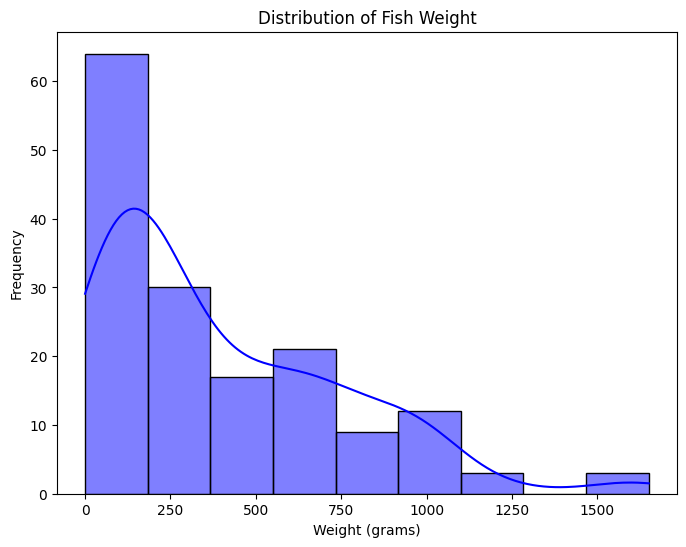

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the distribution of fish weight
plt.figure(figsize=(8,6))
sns.histplot(df['Weight'], kde=True, color='blue')
plt.title('Distribution of Fish Weight')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

Boxplot of Weight by Species

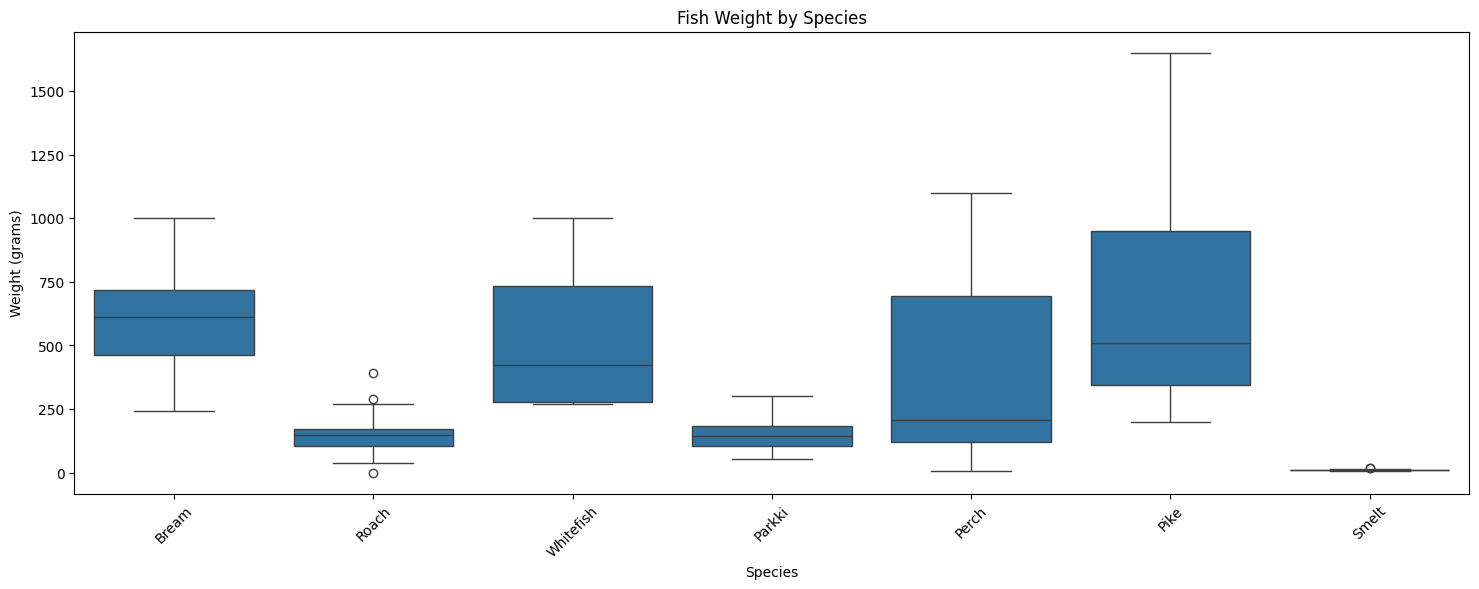

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Species', y='Weight', data=df)
plt.title('Fish Weight by Species')
plt.xlabel('Species')
plt.ylabel('Weight (grams)')
plt.xticks(rotation=45)
plt.show()

Data Preprocessing

Separate Feature and Target Variable

In [ ]:
# Features (independent variables)
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

# Target variable (dependent variable)
y = df['Weight']

#Show the first few rows to confirm
print(X.head())
print(y.head())

   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize Feature

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize the feature (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build Two Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Compare the Models

In [ ]:
from sklearn.metrics import mean_absolute_error

#Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

#Evaluate
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_forest = mean_absolute_error(y_test, y_pred_forest)

print("Linear Regression MAE: ", mae_linear)
print("Random Forest MAE: ", mae_forest)

#Check for overfitting (compare train and test performance)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_forest_train = forest_model.predict(X_train)

mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_forest_train = mean_absolute_error(y_train, y_pred_forest_train)

print("Linear Regression Mae (Train): ", mae_linear_train)
print("Random Forest MAE (Train): ", mae_forest_train)

Linear Regression MAE:  103.90941708422301
Random Forest MAE:  44.63656249999998
Linear Regression Mae (Train):  87.7235326884715
Random Forest MAE (Train):  13.876608923884513


Comparing Linear Regression & Random Forest (Before Tuning)

Linear Regression -> MAE(Train)= 87.72  



Linear Regression -> MAE (Test) = 103.91

Which is slightly underfitting (Train < Test)



Random Forest -> MAE (TRAIN) = 13.88

Random Forest -> MAE (TEST) = 44.63

Overfitting (Train < Test)

Hyperparameter Tuning

Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
forest_grid_search = GridSearchCV(forest_model, param_grid, cv=5)
forest_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest:", forest_grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


Hyperparameter Tuning for Linear Regression

In [ ]:
from sklearn.linear_model import Ridge

#Define the Ridge Regression model
ridge_model = Ridge()

#Define the hyperparameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

#Perform GridSearchCV
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)

#Best hyperparameter
print("Best Alpha for Ridge Regression: ", ridge_grid_search.best_params_)

Best Alpha for Ridge Regression:  {'alpha': 10}


Feature Selection for Ridge Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 3 features for Ridge Regression
selector_ridge = SelectKBest(f_regression, k=3)
X_train_ridge_selected = selector_ridge.fit_transform(X_train, y_train)
X_test_ridge_selected = selector_ridge.transform(X_test)

# Get selected feature indices
selected_features_ridge = selector_ridge.get_support(indices=True)

# Print the selected features
print("Selected Features for Ridge Regression:", selected_features_ridge)

Selected Features for Ridge Regression: [0 1 2]


Feature Selection for Random Forest

In [ ]:
import numpy as np

# Get feature importances from the trained Random Forest model
feature_importances = final_forest_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_features_rf = sorted_indices[:3]  # Select the top 3 features

print("Selected Features for Random Forest:", top_features_rf)

Selected Features for Random Forest: [2 1 0]


Final Model

  Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 3 important features
selector = SelectKBest(f_regression, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected Features for Final Model:", selected_features)

Selected Features for Final Model: [0 1 2]


Build the Final Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the final model using selected features
final_forest_model = RandomForestRegressor(
    n_estimators=forest_grid_search.best_params_['n_estimators'],
    max_depth=forest_grid_search.best_params_['max_depth'],
    min_samples_split=forest_grid_search.best_params_['min_samples_split'],
    random_state=42
)
final_forest_model.fit(X_train_selected, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

Evaluate the Final Models

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
y_pred_final_forest_selected = final_forest_model.predict(X_test_selected)

# Evaluate
mae_final_forest_selected = mean_absolute_error(y_test, y_pred_final_forest_selected)
r2_final_forest_selected = r2_score(y_test, y_pred_final_forest_selected)

# Print results
print("Final Random Forest MAE (Selected Features):", mae_final_forest_selected)
print("Final Random Forest R² Score (Selected Features):", r2_final_forest_selected)


Final Random Forest MAE (Selected Features): 76.89510176910761
Final Random Forest R² Score (Selected Features): 0.8773344431571419


Training the final Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the final model using selected features
final_forest_model = RandomForestRegressor(
    n_estimators=forest_grid_search.best_params_['n_estimators'],
    max_depth=forest_grid_search.best_params_['max_depth'],
    min_samples_split=forest_grid_search.best_params_['min_samples_split'],
    random_state=42
)

# Fit the model using only the selected features
final_forest_model.fit(X_train_selected, y_train)

print("Final Random Forest Model Trained Successfully!")

Final Random Forest Model Trained Successfully!


Evaluate and Comparing the Final Model with Selected Features

In [ ]:
# Predictions with selected features
y_pred_final_forest_selected = final_forest_model.predict(X_test_selected)

# Evaluate
mae_final_forest_selected = mean_absolute_error(y_test, y_pred_final_forest_selected)
r2_final_forest_selected = r2_score(y_test, y_pred_final_forest_selected)

print("Final Random Forest MAE (Selected Features):", mae_final_forest_selected)
print("Final Random Forest R² Score (Selected Features):", r2_final_forest_selected)

Final Random Forest MAE (Selected Features): 76.89510176910761
Final Random Forest R² Score (Selected Features): 0.8773344431571419


Plot: Actual vs Predicted Weight

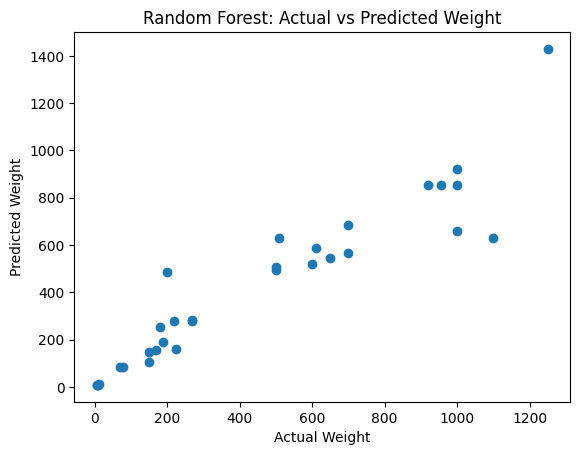

In [ ]:
import matplotlib.pyplot as plt

# Plot for Random Forest
plt.scatter(y_test, y_pred_final_forest_selected)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Actual vs Predicted Weight')
plt.show()

Compare All Models

In [ ]:
# Compare results before and after feature selection
print("Final Random Forest MAE (All Features):", mae_forest)
print("Final Random Forest MAE (Selected Features):", mae_final_forest_selected)

Final Random Forest MAE (All Features): 44.63656249999998
Final Random Forest MAE (Selected Features): 76.89510176910761


Since the Final Random Forest MAE (All Features) = 44.99 is lower than the Final Random Forest MAE (Selected Features) = 76.89, this means:

 Using all features gives a better model.

 Feature selection (using only 3 features) made the model worse.